In [243]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

ImportError: cannot import name 'sns_plot'

### Reading The business data

In [12]:
b_data=pd.read_csv(r'E:\Masters\Machine Learning_MAN\NLP main project\yelps-Business.csv') #change the \ to /
b_data.head(3)
b_data[b_data['business_id'] == "zgQHtqX0gqMw1nlBZl2VnQ"]

business_id                   name        neighborhood  \
3797  zgQHtqX0gqMw1nlBZl2VnQ  "Momofuku Noodle Bar"  Financial District   

                                    address     city state postal_code  \
3797  "190 University Avenue, Ground Floor"  Toronto    ON     M5H 0A3   

       latitude  longitude  stars  review_count  is_open  \
3797  43.649678 -79.386275    3.0           759        1   

                                             categories  
3797  American (New);Ramen;Asian Fusion;Restaurants;...

In [3]:
low_rating = b_data[b_data['stars'] <=3] 
low_rating.head(3)
low_rating[low_rating['stars'] ==2].count()
low_rating.isnull().any()

business_id     False
name            False
neighborhood     True
address         False
city            False
state           False
postal_code      True
latitude        False
longitude       False
stars           False
review_count    False
is_open         False
categories      False
dtype: bool

### Reading The review data

In [4]:
r_data = pd.read_csv(r'E:\Masters\Machine Learning_MAN\NLP main project\yelp_review.csv')
r_data.head(5)

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [5]:
r_data.tail(5)

review_id                 user_id  \
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   
5261664  -CJNPrDWgIkorx4iEZJXIg  mPjPyipaD0C_myqWqDipZg   
5261665  W9eVvOcpBvG6lpJPoJOxuA  mPjPyipaD0C_myqWqDipZg   
5261666  hqQ1UTFKMN2P1ezUow48OQ  mPjPyipaD0C_myqWqDipZg   
5261667  ldsIs3sGXPJ7WM7VyAm4lQ  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
5261663  Ngk84Ax1tXgpoJFEGxot3w      1  2011-11-21   
5261664  pOEL97ld-FJMKO8Ki8JmYg      3  2016-04-30   
5261665  5ubokMNw8qfbX2WtxgJG1Q      4  2011-10-23   
5261666  EO3i5kTUG7_S2OIQ23sdSA      3  2011-11-07   
5261667  HloEEXm_QzEpycuwA_RtQA      3  2011-11-15   

                                                      text  useful  funny  \
5261663  Bought groupon $39 for 4 months from groupon, ...      36      3   
5261664  Spring rolls was pretty good, cod was a bit ra...       0      0   
5261665  Had a 8 dish set meal, was enough for 10 peopl...       3      0   
5261666  A small, cozy family run Authentic korean rest...       2      0   
5261667  Really nice atmosphere and settings and very c...       0      1   

         cool  
5261663     3  
5261664     0  
5261665     1  
5261666     0  
5261667     1

In [129]:
##American (New);Ramen;Asian Fusion;Restaurants;Chinese;Soup;Japanese;Korean  "Momofuku Noodle Bar" avg-3
asian = r_data[r_data['business_id'] =="zgQHtqX0gqMw1nlBZl2VnQ"]
asian.count()
asian = asian.reset_index(drop = True)
asian.head()
asian.tail()
asian.iloc[0]

review_id                 user_id             business_id  \
0  WYDFJOBOl7cycd7gN-c_xA  u0LXt3Uea_GidxRW1xcsfg  zgQHtqX0gqMw1nlBZl2VnQ   
1  f17tpJXCwTE0M137d9yX6g  nOTl4aPC4tKHK35T3bNauQ  zgQHtqX0gqMw1nlBZl2VnQ   
2  3caH15-vEZm-yDGTMM-2sQ  xYciRtVZ1PW4IxSX4oJ1aw  zgQHtqX0gqMw1nlBZl2VnQ   
3  gNGlJMcj_QR0yxHUGjX3lw  JjRelLkHLVtYQO7JYvbCJQ  zgQHtqX0gqMw1nlBZl2VnQ   
4  BPAsFw0HNyaqYYUd3P1TIA  JoxK3Kyr7p-HnHcylBr-Dw  zgQHtqX0gqMw1nlBZl2VnQ   

   stars        date                                               text  \
0      1  2012-10-30  really excited to hear of this restaurant comi...   
1      2  2013-10-19  While I really enjoyed the noodles, their sign...   
2      1  2015-04-03  My review is only for the Noodle Bar, I would ...   
3      4  2015-08-29  Everything on the menu was delicious! The side...   
4      3  2016-01-23  It's nothing special, the ramen is very medioc...   

   useful  funny  cool  
0       9      2     1  
1       2      1     0  
2       2      1     0  
3       0      0     0  
4       0      0     0

In [244]:
#asian.to_csv('asian.csv')

#cleaning the texts
import re
import nltk
#nltk.download('all')          ## nltk.download('stopwords')  just to download stopwords downloading once is enough I guess
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

corpus = []
for i in range(0,760):
    review = re.sub('[^a-zA-Z]', ' ', asian['text'][i])
    review = review.lower()
    review = review.split()
    ps     = PorterStemmer()
    lem    = WordNetLemmatizer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #review = [lem.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
print(corpus[0]) 
#print( asian['text'][0])
#print(lem.lemmatize('better', pos = 'a'))

realli excit hear restaur come toronto final open friend realli excit tri place servic great felt like forgotten us care servic everyth came one time friend order ginger beer came two separ time almost go back make long took absolut vegetarian option except one cold noodl mushroom bun vegetarian pork belli bun noth special piec meat bun vegetarian friend order bun plain could experi well liter gave us plain sauc kimchi momofuko ramen aw bland mushi bite handl eat anymor momofuko place go want real ramen better experi instant noodl


In [83]:
"""creating bag of word model (this one may be for classification after you have labeled them neg or pos)"""
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
#X = cv.fit_transform(corpus).toarray()
#print(X.shape)
#print(X)

'creating bag of word model (this one may be for classification after you have labeled them neg or pos)'

In [245]:
clean= pd.DataFrame(np.array(corpus), columns=['text'])
clean.head()
#asian.head()

text
0  realli excit hear restaur come toronto final o...
1  realli enjoy noodl signatur pork bun seem some...
2  review noodl bar would probabl come momofuku d...
3  everyth menu delici side side seat great chat ...
4  noth special ramen mediocr compost cooki milk ...

In [246]:
# getting the sentiment analysis
def get_label(analysis, threshold = 0):
    print(analysis.sentiment)
    if analysis.sentiment.polarity > 0:
            return 'positive'
    elif analysis.sentiment.polarity == 0:
            return 'neutral'
    else:
            return 'negative'
asian["sentiment"] = clean['text'].apply(lambda review: get_label(TextBlob(review)))

Sentiment(polarity=0.047069597069597076, subjectivity=0.5565934065934065)
Sentiment(polarity=0.19501133786848074, subjectivity=0.4505102040816326)
Sentiment(polarity=0.06677489177489176, subjectivity=0.4372294372294372)
Sentiment(polarity=0.4916666666666667, subjectivity=0.625)
Sentiment(polarity=0.3523809523809524, subjectivity=0.3904761904761905)
Sentiment(polarity=-0.039999999999999994, subjectivity=0.58)
Sentiment(polarity=0.24856681779758702, subjectivity=0.5551821042205657)
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)
Sentiment(polarity=0.5944444444444444, subjectivity=0.6972222222222223)
Sentiment(polarity=0.2492177937005523, subjectivity=0.4618883415435139)
Sentiment(polarity=-0.04960317460317461, subjectivity=0.6209435626102291)
Sentiment(polarity=0.19591269841269834, subjectivity=0.5238166463166465)
Sentiment(polarity=0.08935574229691877, subjectivity=0.5741596638655463)
Sentiment(polarity=0.29999999999999993, subjectivity=0.3101190476190476)
Sentim

In [253]:
asian.to_csv('Momofuku Noodle Bar.csv')
print("\nnegative review count\n",asian[asian['sentiment']=='negative'].count())
print("\npositive review count\n",asian[asian['sentiment']=='positive'].count())

asian.head()
#psoitive review sbtract negative review
res = 625 - 93
print("we have ",res," more positve review for the 'Momofuku Noodle Bar' than negative")


negative review count
 review_id      93
user_id        93
business_id    93
stars          93
date           93
text           93
useful         93
funny          93
cool           93
sentiment      93
dtype: int64

positive review count
 review_id      652
user_id        652
business_id    652
stars          652
date           652
text           652
useful         652
funny          652
cool           652
sentiment      652
dtype: int64
we have  532  more positve review for the 'Momofuku Noodle Bar' than negative


In [171]:
#Restaurants;Italian;Fast Food;Food Court;Pizza    "Sbarro"   avg-1  AyuE2AyyKSZj97SNLAHM9w
italian = r_data[r_data['business_id'] =="AyuE2AyyKSZj97SNLAHM9w"]
italian.stars.count()
italian.iloc[0]
italian[ :3]
italian.iloc[0]
italian = italian.reset_index(drop = True)
italian.head()

review_id                 user_id             business_id  \
0  MW2bnPXpZ4QK2lKX1xU4lw  SRA86Xyf9fbOAhICWttMLQ  AyuE2AyyKSZj97SNLAHM9w   
1  JVuldryLxILr0Aj1b3wWCA  7FhKf2tuC8HUUFm5tPiqgA  AyuE2AyyKSZj97SNLAHM9w   
2  7kbimvdKhqRutx4bk5pAWA  AuTgb6rJsT5J70hPJSTIeQ  AyuE2AyyKSZj97SNLAHM9w   
3  UK-_cLF5jaQoZ0CEsgMrlA  MLe-x4FDHPeDFmaSx7L-aQ  AyuE2AyyKSZj97SNLAHM9w   
4  t3u_WnApMh4Ksly8WTO72g  fHdNrSQhhkCF4Pq1nWnMyA  AyuE2AyyKSZj97SNLAHM9w   

   stars        date                                               text  \
0      4  2013-12-01  For a Saturday evening, the service at Sbarro ...   
1      1  2016-08-13  This was my first experience with Sbarro. Will...   
2      1  2013-11-19  If you like to eat cardboard instead of pizza,...   
3      1  2017-05-04  Yeah, this was pretty bad and a waste of as st...   
4      1  2016-01-09  Did not enjoy my experience here at all. Yes, ...   

   useful  funny  cool  
0       0      0     0  
1       1      0     0  
2       4      0     0  
3       0      0     0  
4       2      0     0

## Doing the analysis using functions

In [255]:
def clean(data,maxi):
    corpus = []
    for i in range(0,maxi):
        review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
        review = review.lower()
        review = review.split()
        ps     = PorterStemmer()
        lem    = WordNetLemmatizer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    print(corpus[0]) 
    print("\n=>original review: " , data['text'][0])
    clear = pd.DataFrame(np.array(corpus), columns=['text'])
    clear.head()
    return clear

                                                                                               
# getting the sentiment analysis
def get_label(analysis, threshold = 0):
    print(analysis.sentiment)
    if analysis.sentiment.polarity > 0:
            return 'positive'
    elif analysis.sentiment.polarity == 0:
            return 'neutral'
    else:
            return 'negative'


    

In [259]:
res = clean(italian,15)                                                
res.head()

italian["sentiment"] = res['text'].apply(lambda review: get_label(TextBlob(review)))
italian.head()

italian.to_csv('Sbarro.csv')
print("\nnegative review count\n",italian[italian['sentiment']=='negative'].count()) 
print("\npositive review count\n",italian[italian['sentiment']=='positive'].count())

#psoitive review sbtract negative review
res = 10 - 5
print("we have ",res," more positve review for the 'Sbarro' than negative")

saturday even servic sbarro pretti quick server took order heat pepperoni chees stromboli right away scoop salad fill drink pretti good select pizza stuf pizza kind stromboli pepperoni chees stromboli amaz good pepperoni chees bread ratio salti went back tri broccoli chicken chees stromboli noth like pepperoni chees even bother

=>original review:  For a Saturday evening, the service at Sbarro was pretty quick. The server took my order and heated up my pepperoni and cheese stromboli right away, as she scooped my salad and filled my drink.

There was a pretty good selection of pizzas, stuffed pizzas and 2 other kinds of stromboli. 

The pepperoni and cheese stromboli is amazing. It was a good pepperoni to cheese to bread ratio, and it was not too salty.

We went back to try the broccoli, chicken and cheese stromboli but that was nothing like the pepperoni and cheese. Don't even bother.
Sentiment(polarity=0.2884353741496598, subjectivity=0.5836734693877551)
Sentiment(polarity=0.110000000

In [212]:
#Burgers;Sports Bars;Nightlife;Fast Food;Bars;Sandwiches;American (Traditional);Restaurants    "Wahlburgers"   avg-2.5
burg = r_data[r_data['business_id'] =="xFkUn2tIJY0vkcm1Hl5m_A"]
burg.stars.count()
burg = burg.reset_index(drop = True)
burg.head(15)
burg.tail()

review_id                 user_id             business_id  \
254  dKIaPOAxhoTgnXs946LKMQ  ZV-ta2C-RW5ERgMnvrE1aw  xFkUn2tIJY0vkcm1Hl5m_A   
255  KLWs5AD3enM5q88Jijaybg  5-CRjlmC_dVV4lufSL0VdA  xFkUn2tIJY0vkcm1Hl5m_A   
256  _tjwZxqu8fS_1IWFfmU3KQ  -RCD8F7qbsLfzT3k1HtMxg  xFkUn2tIJY0vkcm1Hl5m_A   
257  nfVCWNEuJJdJkcN6UPZfMw  Uy-1nxSOQ53-6uRRtEgc-w  xFkUn2tIJY0vkcm1Hl5m_A   
258  g5hVJgNaDPmUM62YpZXDzA  JW_sll1KrQpRCSkJM6zlwA  xFkUn2tIJY0vkcm1Hl5m_A   

     stars        date                                               text  \
254      3  2015-01-10  So they opened up a mediocre burger joint. One...   
255      4  2015-01-04  Our burgerをオーダー。バンズが軽く、パテがジューシーで肉の旨味がしっかり味わえまし...   
256      2  2015-04-14  I was extremely excited that Wahlburgers was c...   
257      2  2014-11-20  I really wanted to like this place as I am a f...   
258      2  2016-07-10  I like the TV show; so I was willing to check ...   

     useful  funny  cool  
254       0      0     0  
255       0      0     0  
256       5      0     0  
257       2      0     1  
258       1      0     0

In [261]:
res = clean(burg,259)                                                
res.head()

burg["sentiment"] = res['text'].apply(lambda review: get_label(TextBlob(review)))
burg.head()


#burg.to_csv('Wahlburgers.csv')




print("\nnegative review count\n",burg[burg['sentiment']=='negative'].count())
print("\npositive review count\n",burg[burg['sentiment']=='positive'].count())

#psoitive review sbtract negative review
res = 228 - 25
print("we have ",res," more positve review for the 'Wahlburgers' than negative")


got burger take rememb correctli consist lettuc tomato pickl patti sauc call burger joint eff patti overcook differ medium cook still juici vs overcook dri af thing happen cowork well happen go back

=>original review:  I got the "Our Burger" for take out - which if I remember correctly it consisted of lettuce, tomato, pickles, patty and some sauce....

How can you call yourself a burger joint when you eff up the patty?!! It was OVERCOOKED, there's a difference between medium cooked and still juicy vs OVERCOOKED and dry af. The same thing happened to 2 of my other coworkers as well so it didn't happen to just me. Not going back!
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.24444444444444446, subjectivity=0.4000000000000001)
Sentiment(polarity=0.10238095238095239, subjectivity=0.39047619047619053)
Sentiment(polarity=0.2089285714285714, subjectivity=0.3630952380952381)
Sentiment(polarity=-0.0833333333333333, subjectivity=0.29666666666666663)
Sentiment(polarity=0.1334166

NameError: name 'sns_plot' is not defined

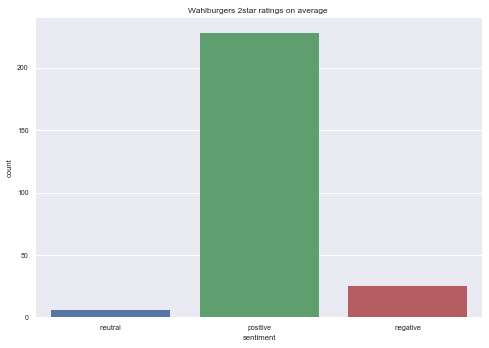

In [242]:
#Burger 

plt.title('Wahlburgers 2star ratings on average ')
sns.set(font_scale=.7)
sns.countplot(x="sentiment", data=burg)
sns_plot.savefig("output.png")
burg['sentiment'].plot()